In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  # Updated import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files
import io

In [ ]:
print("\nPlease upload your file:")
uploaded = files.upload()


Please upload your file:


Saving Salary_Data.csv to Salary_Data (1).csv


In [ ]:
filename = list(uploaded.keys())[0]
dataset = pd.read_csv(io.BytesIO(uploaded[filename]))
print("Columns")
print(dataset.columns.tolist())

Columns
['YearsExperience', 'Salary']


In [ ]:
# Extract features (X) and target variable (y)
# Assuming first column is features (Years of Experience) and second column is target (Salary)
X = dataset.iloc[:, :-1].values  # All rows, all columns except last
y = dataset.iloc[:, -1].values   # All rows, last column only

print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")
print(f"Sample X values: {X[:5].flatten()}")
print(f"Sample y values: {y[:5]}")

Features shape (X): (30, 1)
Target shape (y): (30,)
Sample X values: [1.1 1.3 1.5 2.  2.2]
Sample y values: [39343. 46205. 37731. 43525. 39891.]


In [ ]:
# Split the dataset into training and test sets
print("\n Splitting dataset into training and test sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% for testing, 70% for training
    random_state=0  # For reproducible results
)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")


 Splitting dataset into training and test sets...
Training set size: 21 samples
Test set size: 9 samples


In [ ]:
# Create and train the Linear Regression model
print("\nTraining the Linear Regression model...")

# Create the model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

print("Model training completed!")
print(f"Model coefficient (slope): {regressor.coef_[0]:.2f}")
print(f"Model intercept: {regressor.intercept_:.2f}")


Training the Linear Regression model...
Model training completed!
Model coefficient (slope): 9360.26
Model intercept: 26777.39


In [ ]:
# Make predictions
print("\n Making predictions...")

# Predict on test set
y_pred = regressor.predict(X_test)

print("Predictions vs Actual (first 10 samples):")
for i in range(min(10, len(y_test))):
    print(f"Actual: {y_test[i]:.0f}, Predicted: {y_pred[i]:.0f}, Difference: {abs(y_test[i] - y_pred[i]):.0f}")


 Making predictions...
Predictions vs Actual (first 10 samples):
Actual: 37731, Predicted: 40818, Difference: 3087
Actual: 122391, Predicted: 123188, Difference: 797
Actual: 57081, Predicted: 65154, Difference: 8073
Actual: 63218, Predicted: 63282, Difference: 64
Actual: 116969, Predicted: 115700, Difference: 1269
Actual: 109431, Predicted: 108212, Difference: 1219
Actual: 112635, Predicted: 116636, Difference: 4001
Actual: 55794, Predicted: 64218, Difference: 8424
Actual: 83088, Predicted: 76387, Difference: 6701


In [ ]:
# Evaluate the model
print("\n Model Evaluation:")

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


 Model Evaluation:
R² Score: 0.9741
Root Mean Squared Error: 4834.26



 Creating visualizations...


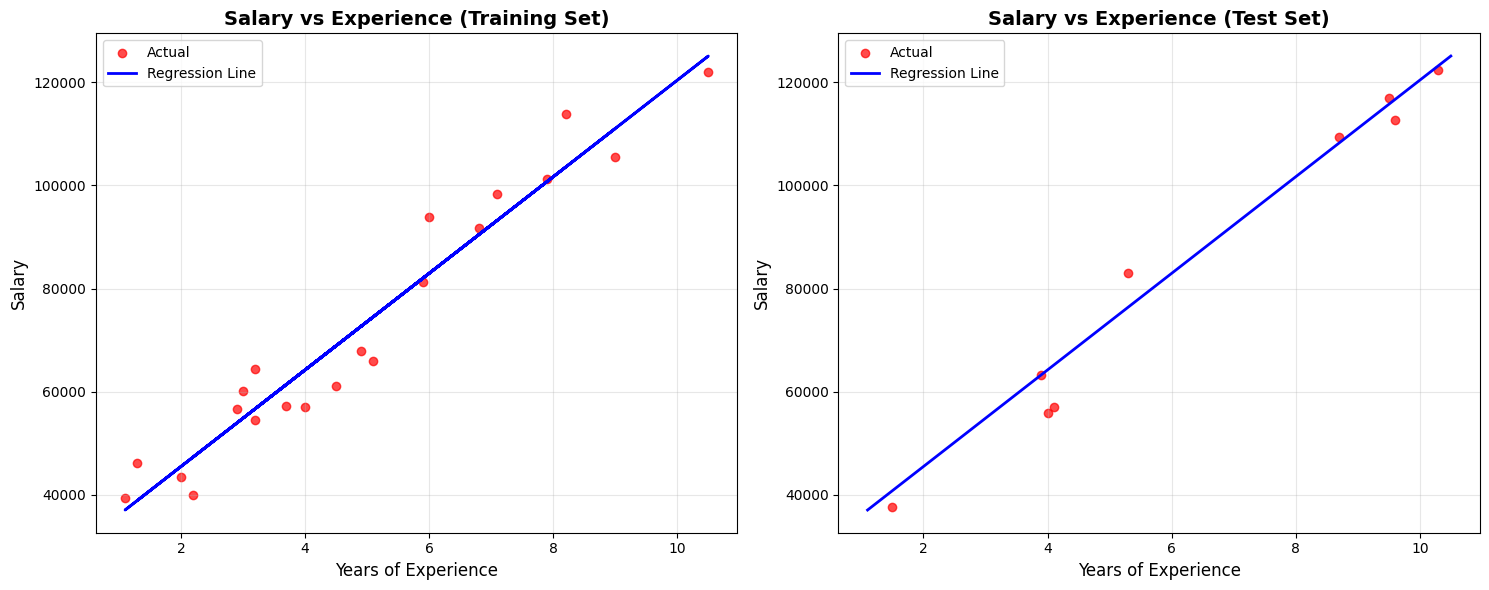

In [ ]:
# Visualize the results
print("\n Creating visualizations...")

# Set up the plotting style
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Training set results
ax1.scatter(X_train, y_train, color='red', alpha=0.7, label='Actual')
ax1.plot(X_train, regressor.predict(X_train), color='blue', linewidth=2, label='Regression Line')
ax1.set_title('Salary vs Experience (Training Set)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Years of Experience', fontsize=12)
ax1.set_ylabel('Salary', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Test set results
ax2.scatter(X_test, y_test, color='red', alpha=0.7, label='Actual')
# Use sorted training data for smooth line
X_train_sorted = np.sort(X_train.flatten())
y_train_pred_sorted = regressor.predict(X_train_sorted.reshape(-1, 1))
ax2.plot(X_train_sorted, y_train_pred_sorted, color='blue', linewidth=2, label='Regression Line')
ax2.set_title('Salary vs Experience (Test Set)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Years of Experience', fontsize=12)
ax2.set_ylabel('Salary', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Additional Analysis
print("\n🔍 Additional Analysis:")

# Display equation
print(f"\nLinear Regression Equation:")
print(f"Salary = {regressor.coef_[0]:.2f} × Experience + {regressor.intercept_:.2f}")

# Prediction example
print("\n💡 Example Prediction:")
example_experience = 5.0
example_prediction = regressor.predict([[example_experience]])
print(f"For {example_experience} years of experience, predicted salary: ${example_prediction[0]:.0f}")


🔍 Additional Analysis:

Linear Regression Equation:
Salary = 9360.26 × Experience + 26777.39

💡 Example Prediction:
For 5.0 years of experience, predicted salary: $73579


In [ ]:
# Final Output
print("\n Final Ouptut ")
print(f"\nLinear Regression Equation:")
print(f"Salary = {regressor.coef_[0]:.2f} × Experience + {regressor.intercept_:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


 Final Ouptut 

Linear Regression Equation:
Salary = 9360.26 × Experience + 26777.39
R² Score: 0.9741
Root Mean Squared Error: 4834.26
